In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
import tensorflow as tf 
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt 

In [21]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [22]:
x_train.shape

(50000, 32, 32, 3)

In [23]:
y_train.shape

(50000, 1)

In [24]:
x_test.shape

(10000, 32, 32, 3)

In [25]:
y_test.shape

(10000, 1)

In [26]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [27]:
y_train[0]

array([6], dtype=uint8)

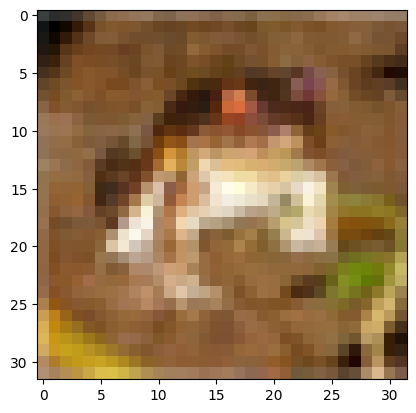

In [28]:
plt.imshow(x_train[0])

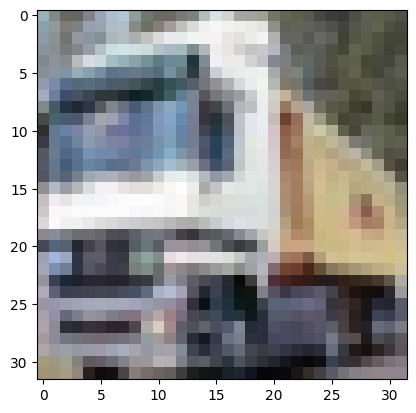

In [29]:
plt.imshow(x_train[1])

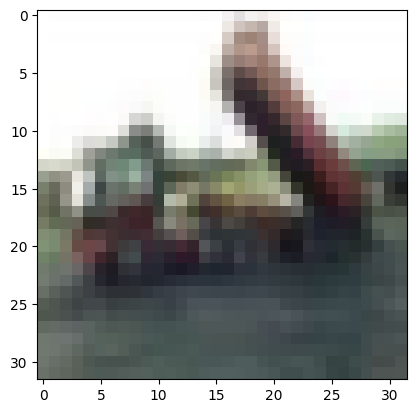

In [30]:
plt.imshow(x_train[2])

In [31]:
x_train=x_train/255.0
x_test=x_test/255.0

In [32]:
#ANN

ann =models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])
ann.compile(optimizer='SGD',
           loss ='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=10)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.2970 - loss: 1.9542
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4121 - loss: 1.6698
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.4411 - loss: 1.5754
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4676 - loss: 1.5161
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.4854 - loss: 1.4595
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5007 - loss: 1.4172
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5110 - loss: 1.3827
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.5250 - loss: 1.3525
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.5372 - loss: 1.3228
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5475 - loss: 1.2937


In [33]:
from sklearn.metrics import classification_report 
y_pred =ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('classification_report',classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
classification_report               precision    recall  f1-score   support

           0       0.56      0.56      0.56      1000
           1       0.69      0.60      0.64      1000
           2       0.36      0.43      0.39      1000
           3       0.40      0.22      0.29      1000
           4       0.49      0.33      0.40      1000
           5       0.47      0.29      0.35      1000
           6       0.36      0.83      0.50      1000
           7       0.60      0.57      0.58      1000
           8       0.69      0.60      0.64      1000
           9       0.62      0.56      0.59      1000

    accuracy                           0.50     10000
   macro avg       0.52      0.50      0.49     10000
weighted avg       0.52      0.50      0.49     10000



In [ ]:
#CNN

cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    
    
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

In [35]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [36]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.3880 - loss: 1.6795
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6038 - loss: 1.1312
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6570 - loss: 0.9776
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6952 - loss: 0.8830
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7206 - loss: 0.8010


In [37]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6599 - loss: 0.9818


[0.9921166896820068, 0.6517999768257141]

In [42]:
y_pred=cnn.predict(x_test)
y_pred[:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[1.2972021e-01, 7.4117971e-03, 2.4306346e-02, 5.6631887e-01,
        8.1626902e-04, 1.9744630e-01, 1.0476847e-02, 1.1242061e-03,
        3.1108811e-02, 3.1270333e-02],
       [3.1023740e-03, 8.2550906e-02, 2.3669431e-04, 4.7695990e-05,
        1.4393439e-06, 4.3095347e-06, 1.7392194e-06, 3.4749010e-07,
        9.1328138e-01, 7.7308126e-04],
       [1.2480702e-01, 3.0254304e-01, 1.2182082e-02, 9.6973721e-03,
        5.3678633e-04, 7.7776215e-04, 3.2803174e-03, 2.7701736e-04,
        5.1202983e-01, 3.3868771e-02],
       [4.7581667e-01, 4.8195947e-02, 1.4172843e-02, 1.1853686e-03,
        6.9773727e-04, 8.9472262e-05, 4.6069067e-04, 2.3485096e-05,
        4.5662764e-01, 2.7301894e-03],
       [6.4122374e-04, 1.3736765e-03, 1.1128284e-01, 2.0765157e-01,
        3.0188200e-01, 3.5092346e-02, 3.3321166e-01, 6.2592851e-04,
        7.8671630e-03, 3.7174483e-04]], dtype=float32)